## 1️⃣ Load Scaled Training Data (ONLY TRAIN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

X_train = pd.read_csv("X_train_scaled_v1.csv")
X_test  = pd.read_csv("X_test_scaled_v1.csv")

X_train.shape, X_test.shape


((2344, 81), (586, 81))

## 2️⃣ Fit PCA (Important: FIT ONLY ON TRAIN)

In [3]:
# Select only numeric features for PCA
numeric_features = X_train.select_dtypes(include=[np.number]).columns

X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]

pca = PCA()
X_train_pca = pca.fit_transform(X_train_numeric)

What `.fit()` did here

- learned principal directions

- learned variance along each direction

- learned how features interact

## 3️⃣ Explained Variance Ratio

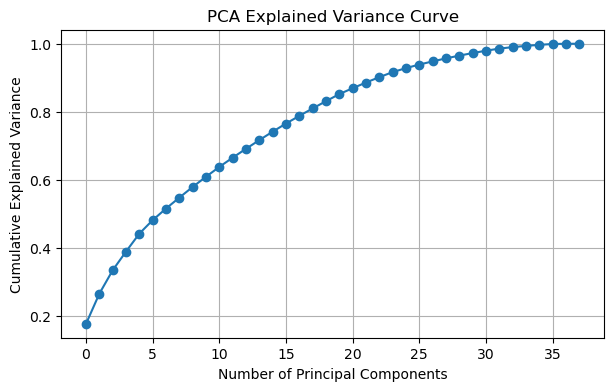

In [4]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(7,4))
plt.plot(explained_variance, marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance Curve")
plt.grid(True)
plt.show()

## 4️⃣ How Many Components Are Enough?

In [5]:
n_components_90 = np.argmax(explained_variance >= 0.90) + 1
n_components_95 = np.argmax(explained_variance >= 0.95) + 1

n_components_90, n_components_95


(np.int64(23), np.int64(28))

Interpretation

- 90% variance → fewer components

- 95% variance → more safety, less compression

- Trade-off, not a rule

## 5️⃣ Refit PCA with Chosen Components (90% first)

In [7]:
pca_90 = PCA(n_components=n_components_90)

X_train_pca_90 = pca_90.fit_transform(X_train_numeric)
X_test_pca_90  = pca_90.transform(X_test_numeric)

X_train_pca_90.shape


(2344, 23)

## 6️⃣ PCA Feature Space Is NOT Interpretable

### Mathematical Form of a Principal Component

Each principal component is a **linear combination of the original features**.

The first principal component is written as:

$$
\text{PC}_1 = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n
$$

Where:

$$
x_1, x_2, \ldots, x_n
$$

are the original input features, and

$$
w_1, w_2, \ldots, w_n
$$

are the learned weights (also called **loadings**) computed by PCA.

Each principal component is therefore **not a single feature**, but a **weighted mixture of multiple features**.

---

### Interpretation

This equation tells us something very important:

- PCA does **not** keep original features
- PCA creates **new transformed features**
- Each new feature mixes information from many original features

In short:

**PCA trades interpretability for compactness.**

---

### Practical Consequences

- PCA is **excellent for prediction**
- PCA is **useful for noise reduction**
- PCA is **poor for feature-level explanation**

You cannot easily answer questions like:
- “Which original feature caused this prediction?”

Because PCA components do not map cleanly back to individual features.

---

### Conceptual Setup for the Next Topic

This naturally leads to an important comparison:

**Feature Selection vs PCA**

- Feature Selection → keeps original features and meaning  
- PCA → creates compact representations with reduced interpretability  

Both reduce dimensionality,  
but they serve **different purposes**.


## 7️⃣ Save PCA Outputs (Pipeline Discipline)

In [8]:
pd.DataFrame(X_train_pca_90).to_csv("X_train_pca90_v1.csv", index=False)
pd.DataFrame(X_test_pca_90).to_csv("X_test_pca90_v1.csv", index=False)

print("Saved PCA-transformed datasets (90% variance).")


Saved PCA-transformed datasets (90% variance).


## 📌 Why Do We Choose 90% Explained Variance in PCA?

After applying Principal Component Analysis (PCA) on the numeric features of the Ames Housing dataset, we obtained the following results:

- **23 principal components** retain **90% of the total variance**
- **28 principal components** retain **95% of the total variance**

This raises an important question:

> **Why do we commonly choose 90% explained variance instead of 95% or 100%?**

---

### 🔹 What Does “Variance” Mean in PCA?

In PCA, **variance represents information**.

- High variance → important structure and patterns in the data  
- Low variance → redundancy or noise  

PCA finds new orthogonal directions (principal components) such that:
- the **first component captures the maximum variance**
- each next component captures the maximum remaining variance

---

### 🔹 Explained Variance Ratio (Conceptual Meaning)

Each principal component has an associated **eigenvalue**, which represents how much variance that component captures.

The **explained variance ratio** of a component is:

> variance captured by that component  
> divided by  
> total variance in the dataset

In simple terms:

> **Explained Variance Ratio = (information in one component) / (total information)**

---

### 🔹 Cumulative Explained Variance

When we add explained variance ratios component by component, we get **cumulative explained variance**.

We choose the **smallest number of components** such that:

> cumulative explained variance ≥ 90%

In our dataset, this happens when:

- **23 components** together explain **90% of the variance**

This means:
> We can represent the dataset using 23 dimensions instead of many original numeric features, while keeping most of the information.

---

### 🔹 What Does “90% Variance Retained” Mean Intuitively?

Choosing 90% explained variance means:

> *We compress the dataset into fewer dimensions while still preserving 90% of the original information.*

The remaining 10% usually consists of:
- noise  
- very small fluctuations  
- highly redundant information  

Removing this part often helps models **generalize better**.

---

### 🔹 Why Not 95% or 100%?

| Explained Variance | Interpretation |
|------------------|----------------|
| 100% | No dimensionality reduction |
| 95% | Safer but higher complexity |
| **90%** | **Best balance between information and simplicity** |
| < 80% | High risk of information loss |

In our case:
- 90% variance → **23 components**
- 95% variance → **28 components**

The extra 5 components add very little new information but increase:
- dimensionality
- computational cost
- model complexity

---

### 🔹 Machine Learning & Engineering Perspective

From a practical ML point of view:

- Fewer dimensions → less overfitting  
- Less redundancy → better numerical stability  
- Faster training and simpler models  

Therefore, **90% explained variance** is widely used in:
- regression pipelines
- preprocessing before modeling
- real-world machine learning systems

---

### ✅ Final Takeaway

> **Choosing 90% explained variance preserves most of the information while removing redundancy, resulting in simpler, faster, and more generalizable models.**

This choice is:
- mathematically sound
- empirically effective
- commonly accepted in both academia and industry

---
